In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def generate_shifting_gaussian(n_samples=300, seed=42):
    """
    p(x|y) = N(μ₀ + β·y, Σ)
    Mean shifts linearly with y.
    """
    np.random.seed(seed)

    # Parameters
    mu_0 = np.array([-1.5, -1.0])
    beta = np.array([3.0, 2.0])  # How mean shifts with y
    cov = np.array([[0.3, 0.1], [0.1, 0.25]])

    # Generate y uniformly
    y = np.random.uniform(0, 1, n_samples)

    # Sample x from p(x|y)
    X = np.zeros((n_samples, 2))
    for i in range(n_samples):
        mean = mu_0 + beta * y[i]
        X[i] = np.random.multivariate_normal(mean, cov)

    return X, y, {'mu_0': mu_0, 'beta': beta, 'cov': cov, 'name': 'Shifting Gaussian'}


def plot_shifting_gaussian(X, y, params, ax):
    """Plot with density contours for different y levels."""
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20, alpha=0.7)

    # Plot density contours for y = 0.2, 0.5, 0.8
    y_levels = [0.2, 0.5, 0.8]
    colors = ['blue', 'green', 'red']

    # for y_val, color in zip(y_levels, colors):
    #     mean = params['mu_0'] + params['beta'] * y_val
    #     plot_ellipse(ax, mean, params['cov'], color, f'y={y_val}')

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('1. Shifting Conditional Gaussian')
    # ax.legend(loc='upper left', fontsize=9)
    plt.colorbar(scatter, ax=ax, label='Target y')

In [27]:
X, y, params = generate_shifting_gaussian(5000, seed=42)

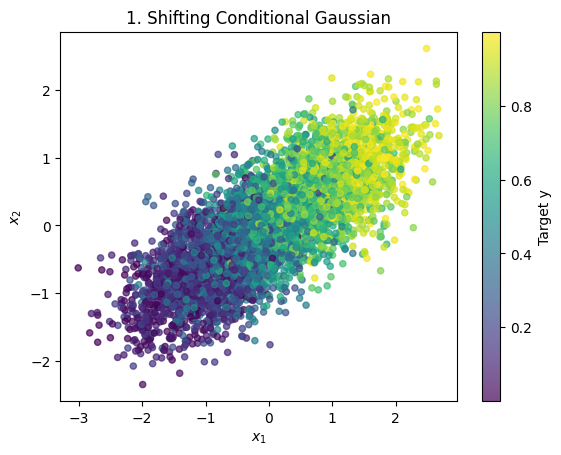

In [28]:
plot_shifting_gaussian(X, y, params, ax=plt.gca())

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

In [31]:
df

,x1,x2,y
0,0.522883,-0.806216,0.374540
1,1.318834,1.355954,0.950714
2,0.326158,0.400485,0.731994
3,0.758047,-0.114742,0.598658
4,-1.068797,-1.155611,0.156019
...,...,...,...
4995,1.632625,0.983237,0.897397
4996,-1.140877,-0.970152,0.119381
4997,0.186470,-0.208196,0.327843
4998,0.299158,0.254255,0.815745


In [32]:
df.to_csv("../data/regression/toy_regression.csv", index=False)

In [33]:
pd.read_csv("../toy_regression.csv")

,x1,x2,y
0,-0.121761,-0.754577,0.374540
1,1.012075,0.957110,0.950714
2,0.148894,0.605379,0.731994
3,-0.225356,0.031825,0.598658
4,-0.574108,-1.204243,0.156019
...,...,...,...
995,-0.934978,-0.982933,0.091582
996,1.732778,0.395403,0.917314
997,-0.778813,-0.633610,0.136819
998,1.536493,0.918489,0.950237
